# Part I - PISA 2012 Analysis
## by Naomi Sidi


## Table of Contents
<ul>
    
1. [Introduction](#introduction)
    
2. [Preliminary Wrangling](#prelim)
    
3. [Univariate Exploration](#univariate)
    
    3.1 [Distribution of SocioEconomic Factors](#socio)
    
    3.2 [Distribution of Possessions](#possessions)
    
    3.3 [Distribution of Future Academic Pursuits](#future)
    
    3.4 [Distribution of Learning Strategies](#learning)
    
    3.5 [Distribution of Scores](#scores)
    
    3.6 [Summary of Univariate Observations](#unobs)

4. [Bivariate Exploration](#bivariate)
    
    4.1[Top 5 Countries by Scores](#top5)
    
    4.2 [Acheivement by Gender](#gender)
    
    4.3 [Future Academic Pursuits by Learning Strategy](#futurestrategy)
    
    4.4 [Popular Careers by Country](#futurecareer)
    
    4.5 [Most Popular Learning Strategy by Country](#popularstrategy)
    
    4.6 [Summary of Bivariate Observations](#bivobs)
5. [Multivariate Exploration](#multivariate)

    5.1 [What is the Correlation of each Weighted Scores](#pairplot)
    
    5.2 [Relationship of Possession of Books, Country and Reading Scores](#genderachiev)
    
    5.3 [Impact of Socioeconomic Status on Achievement and Future Career Choice](#sociocountries)
    
    5.4 [Does the Immigration Status influence Average Math Score and Future Career?](#immigmath)
    
    5.5 [Does the Immigration Status influence SocioEconomic Status and Overall Achievement?](#immigsocio)
6. [Conclusions](#concl) 
    
</ul>

## Introduction
<a id="introduction"></a>

The PISA (Programme for International Student Assessment ) is an internationally standardized assessment administered to 15-year-olds by OECD every 3 years to know how well education systems prepare students for real-life situations. The results of the PISA test are then used for policy making purposes to improve the quality of education.

In 2012, 510 000 students from 65 countries/economies(both member and partner states) took part in the assessment. The test covered reading, mathematics, science, financial literacy and problem-solving skills with a major focus on mathematical literacy. In addition to the technical topics, students also responded to a background questionnaire as part of the assessment.


## Preliminary Wrangling
<a id="prelim"></a>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline
# suppress warnings from final output
import warnings
warnings.filterwarnings('ignore')

I will now load the dataset and perform minimal exploration to understand the data.  


In [2]:
df = pd.read_csv('pisa2012.csv', encoding = 'cp1252', index_col = 0) #read the dataset into a pandas dataframe

In [3]:
print(df.shape) #Check number of rows and columns
print(df.info()) #Check general information about the data
df.head()#View first five columns

(485490, 635)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 485490 entries, 1 to 485490
Columns: 635 entries, CNT to VER_STU
dtypes: float64(250), int64(17), object(368)
memory usage: 2.3+ GB
None


,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,2,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,9,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,8,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,10,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [4]:
#Specify only necessary variables for analysis and check a sample of the dataframe
df = df[['CNT', 'ST04Q01', 'ST15Q01', 'ST19Q01', 'ST26Q01', 'IMMIG', 
         'ST26Q02', 'ST26Q03', 'ST26Q04', 'ST26Q05', 'ST26Q06', 
         'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10', 'ST26Q11', 
         'ST26Q12', 'ST26Q13', 'ST26Q14', 'ST26Q15', 'ST26Q16', 
         'ST26Q17', 'ST27Q01', 'ST27Q02', 'ST27Q03', 'ST27Q04', 
         'ST27Q05', 'ST28Q01', 'ST48Q01', 'ST48Q02', 'ST48Q03', 
         'ST48Q04', 'ST48Q05', 'ST53Q01', 'ST53Q02', 'ST53Q03', 
         'ST53Q04', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 
         'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 
         'PV5READ', 'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 
         'PV5SCIE', 'W_FSTUWT']]
df.sample(5)

,CNT,ST04Q01,ST15Q01,ST19Q01,ST26Q01,IMMIG,ST26Q02,ST26Q03,ST26Q04,ST26Q05,...,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT
374525,Peru,Female,"Other (e.g. home duties, retired)",Working full-time <for pay>,Yes,Native,Yes,Yes,Yes,No,...,524.4075,479.1318,517.2587,491.0465,421.2421,460.4066,425.9045,487.4487,419.3771,116.4824
265240,Italy,Male,"Other (e.g. home duties, retired)",Working full-time <for pay>,Yes,Native,NaN,NaN,NaN,NaN,...,426.5363,340.7282,367.9943,380.8255,278.5714,422.1746,341.0481,370.8877,342.9131,3.9130
195195,United Kingdom,Female,Working full-time <for pay>,Working full-time <for pay>,Yes,Native,Yes,Yes,Yes,Yes,...,506.7738,482.9445,494.8591,478.1786,487.3555,517.1951,492.9504,481.7605,437.9336,10.0816
229672,Ireland,Male,"Other (e.g. home duties, retired)",Working full-time <for pay>,Yes,Native,Yes,Yes,Yes,No,...,641.7784,620.1259,654.6095,637.7687,621.7270,696.3260,653.4316,686.0686,622.6595,10.0045
228838,Ireland,Male,Working full-time <for pay>,"Other (e.g. home duties, retired)",Yes,Native,Yes,Yes,Yes,Yes,...,554.1258,571.7686,552.5219,514.8305,530.6229,542.7452,529.6904,580.0448,554.8676,10.4276


In [5]:
#check for duplicates 
df.duplicated().sum()

0

In [6]:
#check for missing values
df.isna().sum()

CNT              0
ST04Q01          0
ST15Q01      17739
ST19Q01      34080
ST26Q01      12411
IMMIG        13697
ST26Q02      15797
ST26Q03      13470
ST26Q04      11613
ST26Q05      22312
ST26Q06      12308
ST26Q07      19630
ST26Q08      18396
ST26Q09      18241
ST26Q10      14248
ST26Q11      21924
ST26Q12      11451
ST26Q13      16375
ST26Q14      11414
ST26Q15          0
ST26Q16          0
ST26Q17          0
ST27Q01       8411
ST27Q02       8942
ST27Q03      12031
ST27Q04      12991
ST27Q05      15847
ST28Q01      11725
ST48Q01     191080
ST48Q02     195663
ST48Q03     187011
ST48Q04     217774
ST48Q05     197498
ST53Q01     175543
ST53Q02     175610
ST53Q03     176218
ST53Q04     176559
PV1MATH          0
PV2MATH          0
PV3MATH          0
PV4MATH          0
PV5MATH          0
PV1READ          0
PV2READ          0
PV3READ          0
PV4READ          0
PV5READ          0
PV1SCIE          0
PV2SCIE          0
PV3SCIE          0
PV4SCIE          0
PV5SCIE          0
W_FSTUWT    

**Finding**: There are very many missing values for the student responses. However, since there are no missing values for the main variables of interest, scores, we'll proceed with the visualization.

### What is the structure of your dataset?

There are 485,490 responses and 635 columns in the dataset. Almost half of the responses are of type string(368) and the rest are numerical; 250 columns of type float and only 17 columns of type int64.

### What is/are the main feature(s) of interest in your dataset?

Since the dataset is so large. I will only docus on a few categories of interest that influence achievement. I am particularly interested in the achievement in the three main subjects; Mathematics, Reading and Science.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

It will be interesting to first discover the top performing countries and whether a student's socio-economic status, future academic interests and their preferred learning strategies influence their overall score. 

For this exploration, the following variables will be used:
1. CNT:	Country code 3-character                
2. ST04Q01:	Gender                                                                                        
3. ST15Q01:	Mother Current Job Status  
4. ST19Q01:	Father Current Job Status 
5. ST26Q01 - ST26Q12: Responses on Possessions (desk, own room, art, poetry, etc)
6. ST27Q01 - ST27Q05: Responses on socioeconomic indicators(phones, television, cars ets) 
7. ST48Q01 - ST48Q05: Future Academic Courses(Maths, Science, Languages)	
8. ST53Q01 - ST53Q04: Learning Strategies
9. PV1MATH - PV5MATH: Plausible valueS in mathematics (5 Values)
10. PV1READ - PV5READ: Plausible valueS in reading (5 Values)
11. PV1SCIE - PV5SCIE: Plausible valueS in science (5 Values)
12. W_FSTUWT: FINAL STUDENT WEIGHT

Only the above columns will be used in this analysis.

<a id="univariate"></a>
## Univariate Exploration

In this section, I will investigate the distributions of specific variables of interest before I investigate the relationship between the variables. 

In [7]:
#Make a copy of the dataframe before beginning visualization
pisa = df.copy()

<a id="socio"></a>
### What is the Distribution of Socioeconomic Factors?

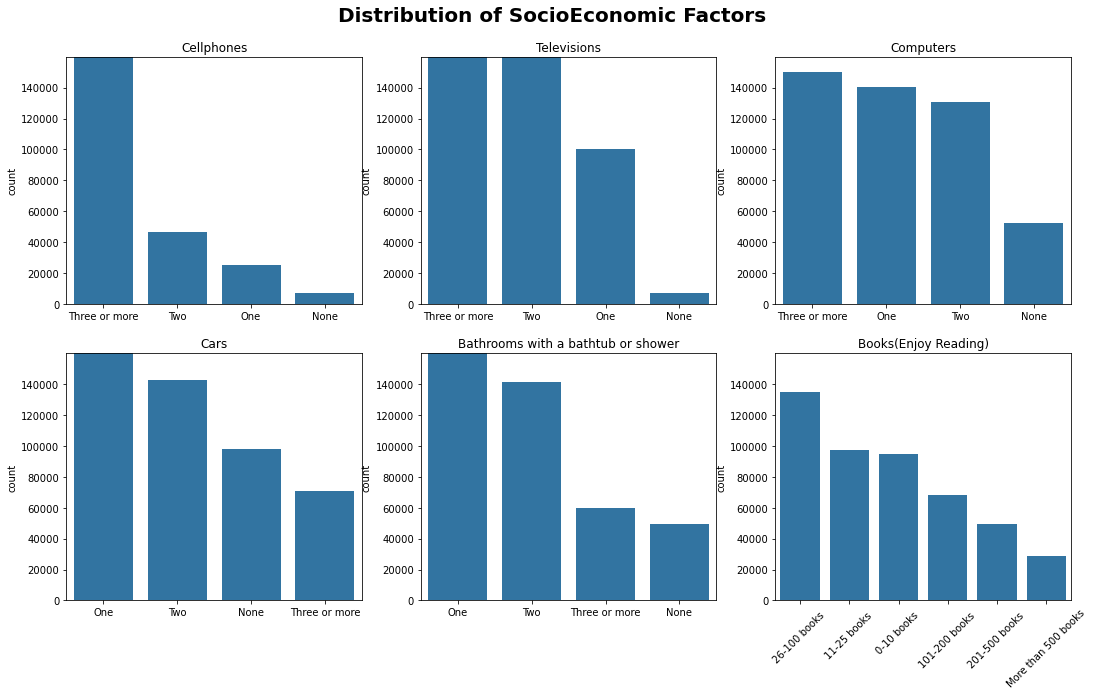

In [8]:
#Let's plot the Distribution of SocioEconomic Factors
fig = plt.figure(figsize = (18,10))
yticks = np.arange(0,160000,20000)
base_color = sb.color_palette()[0]

ax1 = fig.add_subplot(2,3,1)
sb.countplot(data=pisa, x= 'ST27Q01', order = pisa['ST27Q01'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Cellphones')
plt.yticks(yticks)
plt.xlabel('')

ax2 = fig.add_subplot(2,3,2)
sb.countplot(data=pisa, x= 'ST27Q02', order = pisa['ST27Q02'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Televisions')
plt.yticks(yticks)
plt.xlabel('')

ax3 = fig.add_subplot(2,3,3)
sb.countplot(data=pisa, x= 'ST27Q03', 
             order = pisa['ST27Q03'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Computers')
plt.yticks(yticks)
plt.xlabel('')

ax4 = fig.add_subplot(2,3,4)
sb.countplot(data=pisa, x= 'ST27Q04', 
             order = pisa['ST27Q04'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Cars')
plt.yticks(yticks)
plt.xlabel('')

ax5 = fig.add_subplot(2,3,5)
sb.countplot(data=pisa, x= 'ST27Q05', 
             order = pisa['ST27Q05'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Bathrooms with a bathtub or shower')
plt.yticks(yticks)
plt.xlabel('')

ax6 = fig.add_subplot(2,3,6)
sb.countplot(data=pisa, x= 'ST28Q01', 
             order = pisa['ST28Q01'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Books(Enjoy Reading)')
plt.yticks(yticks)
plt.xticks(rotation=45, ha='center')
plt.xlabel('')

plt.suptitle('Distribution of SocioEconomic Factors', 
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black');

**Observations**: It appears that majority of households have three or more cellphones, televisions and computers. It also seems that most households have one car and share one bathroom. Books seem to be in all households and most have 26 to 100 books which does not include magazines, newspapers or school books.

Next, we'll try to understand the distribution of possessions.

<a id="possessions"></a>
### What is the Distribution of Possessions?

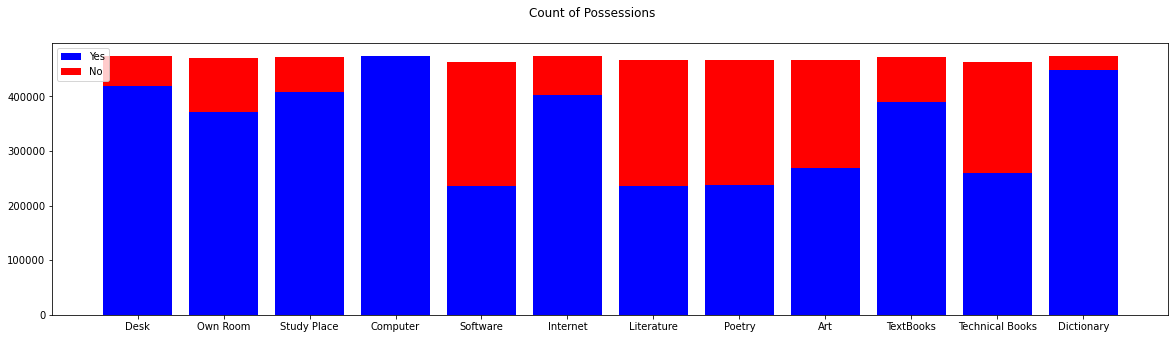

In [9]:
#Plotting distribution of possessions as socioeconomic indicators
plt.figure(figsize=[20,5]).suptitle('Count of Possessions')

yes = pisa['ST26Q01'].value_counts()[0]
no =  pisa['ST26Q01'].value_counts()[1]
plt.bar('Desk', yes, color='b')
plt.bar('Desk', no, bottom=yes, color='r')

yes = pisa['ST26Q02'].value_counts()[0]
no =  pisa['ST26Q02'].value_counts()[1]
plt.bar('Own Room', yes, color='b')
plt.bar('Own Room', no, bottom=yes, color='r')

yes = pisa['ST26Q03'].value_counts()[0]
no =  pisa['ST26Q03'].value_counts()[1]
plt.bar('Study Place', yes, color='b')
plt.bar('Study Place', no, bottom=yes, color='r')

yes = pisa['ST26Q04'].value_counts()[0]
no =  pisa['ST26Q04'].value_counts()[1]
plt.bar('Computer', yes, color='b')
plt.bar('Computer', no, bottom=yes, color='b')

yes = pisa['ST26Q05'].value_counts()[0]
no =  pisa['ST26Q05'].value_counts()[1]
plt.bar('Software', yes, color='b')
plt.bar('Software', no, bottom=yes, color='r')

yes = pisa['ST26Q06'].value_counts()[0]
no =  pisa['ST26Q06'].value_counts()[1]
plt.bar('Internet', yes, color='b')
plt.bar('Internet', no, bottom=yes, color='r')

yes = pisa['ST26Q07'].value_counts()[0]
no =  pisa['ST26Q07'].value_counts()[1]
plt.bar('Literature', yes, color='b')
plt.bar('Literature', no, bottom=yes, color='r')

yes = pisa['ST26Q08'].value_counts()[0]
no =  pisa['ST26Q08'].value_counts()[1]
plt.bar('Poetry', yes, color='b')
plt.bar('Poetry', no, bottom=yes, color='r')

yes = pisa['ST26Q09'].value_counts()[0]
no =  pisa['ST26Q09'].value_counts()[1]
plt.bar('Art', yes, color='b')
plt.bar('Art', no, bottom=yes, color='r')

yes = pisa['ST26Q10'].value_counts()[0]
no =  pisa['ST26Q10'].value_counts()[1]
plt.bar('TextBooks', yes, color='b')
plt.bar('TextBooks', no, bottom=yes, color='r')

yes = pisa['ST26Q11'].value_counts()[0]
no =  pisa['ST26Q11'].value_counts()[1]
plt.bar('Technical Books', yes, color='b')
plt.bar('Technical Books', no, bottom=yes, color='r')

yes = pisa['ST26Q12'].value_counts()[0]
no =  pisa['ST26Q12'].value_counts()[1]
plt.bar('Dictionary', yes, color='b')
plt.bar('Dictionary', no, bottom=yes, color='r')

plt.legend(['Yes', 'No'])
plt.show();

**Observations**: All students appear to have computers. Most of them have desks, their own rooms, a study place, the internet, text books and dictionaries. However, educational software, poetry, art and literature are less popular.

<a id="future"></a>
### What is the distribution of Future Academic Pursuits

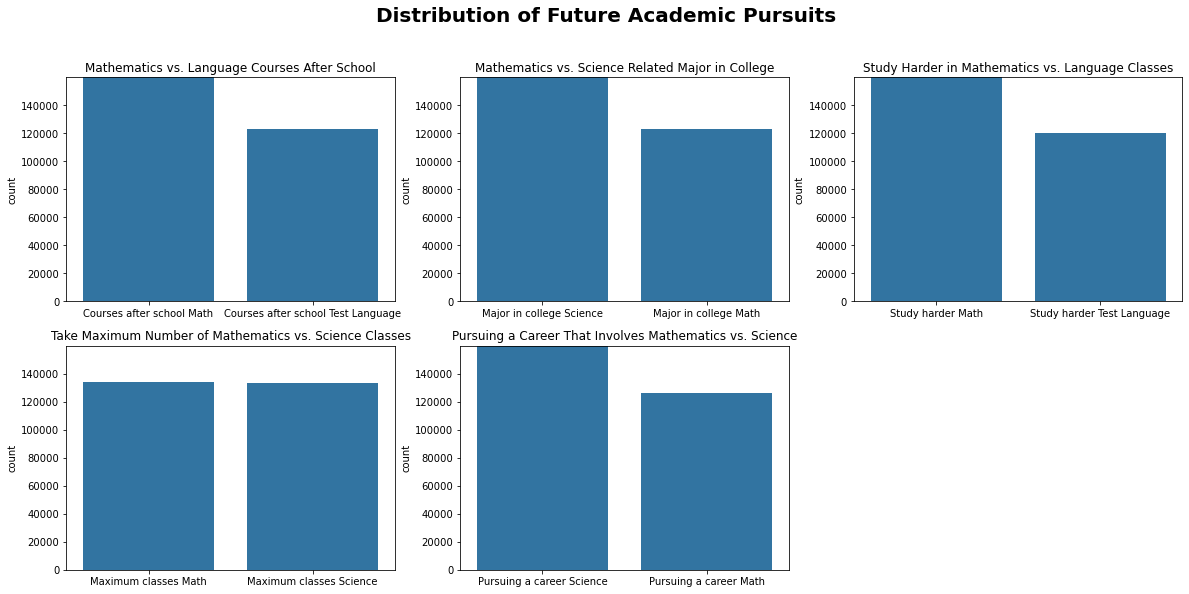

In [10]:
#Distribution of Future Academic Pursuits
fig = plt.figure(figsize = (20,14))
yticks = np.arange(0,160000,20000)
base_color = sb.color_palette()[0]

##plt.title('Distribution of Future Academic Pursuits')
ax1 = fig.add_subplot(3,3,1)
sb.countplot(data=pisa, x= 'ST48Q01', order = pisa['ST48Q01'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Mathematics vs. Language Courses After School')
plt.yticks(yticks)
plt.xlabel('')

ax2 = fig.add_subplot(3,3,2)
sb.countplot(data=pisa, x= 'ST48Q02', order = pisa['ST48Q02'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Mathematics vs. Science Related Major in College')
plt.yticks(yticks)
plt.xlabel('')
plt.xlabel('')

ax3 = fig.add_subplot(3,3,3)
sb.countplot(data=pisa, x= 'ST48Q03', order = pisa['ST48Q03'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Study Harder in Mathematics vs. Language Classes')
plt.yticks(yticks)
plt.xlabel('')
plt.xlabel('')

ax4 = fig.add_subplot(3,3,4)
sb.countplot(data=pisa, x= 'ST48Q04', order = pisa['ST48Q04'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Take Maximum Number of Mathematics vs. Science Classes')
plt.yticks(yticks)
plt.xlabel('')
plt.xlabel('')

ax5 = fig.add_subplot(3,3,5)
sb.countplot(data=pisa, x= 'ST48Q05', order = pisa['ST48Q05'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Pursuing a Career That Involves Mathematics vs. Science')
plt.yticks(yticks)
plt.xlabel('')
plt.xlabel('')

plt.suptitle('Distribution of Future Academic Pursuits', 
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black');

**Observations**: 
1. More students intend to  to take additional Mathematics courses rather than Language courses after they finish high school.
2. More student plan to major in Sciences rather than Mathematics
3. More students are willing to study harder in Mathematics rather than in Language.
4. Students plan to take equal number of Mathematics and Science classes
5. Students are more inclined to pursue a career in Science rather than a career in Mathematics
              
Next, we'll try to understand the distribution of learning strategies.

<a id="learning"></a>
### What is the Distribution of Learning Strategies?

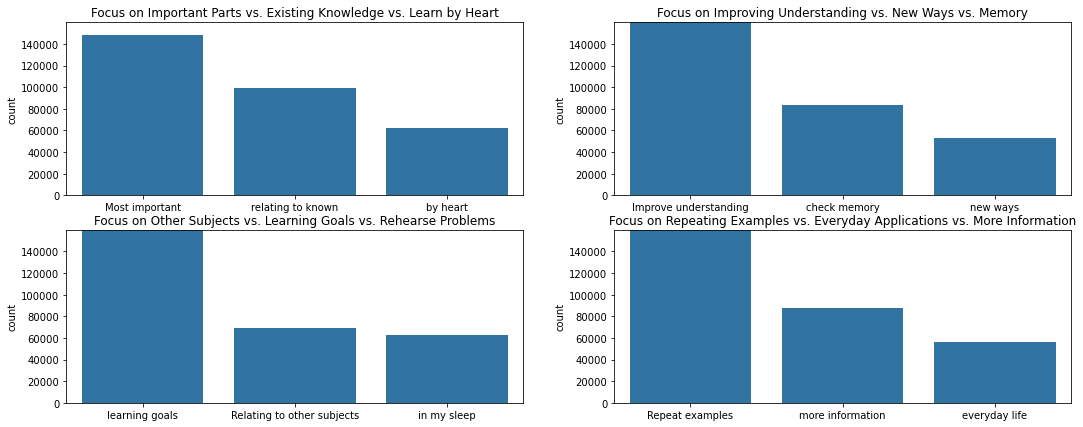

In [30]:
#Distribution of Learning Strategies
fig = plt.figure(figsize = [18,7])
yticks = np.arange(0,160000,20000)
base_color = sb.color_palette()[0]

ax1 = fig.add_subplot(2,2,1)
sb.countplot(data=pisa, x= 'ST53Q01', order = pisa['ST53Q01'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Focus on Important Parts vs. Existing Knowledge vs. Learn by Heart')
plt.yticks(yticks)
plt.xlabel('')

ax2 = fig.add_subplot(2,2,2)
sb.countplot(data=pisa, x= 'ST53Q02', order = pisa['ST53Q02'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Focus on Improving Understanding vs. New Ways vs. Memory')
plt.yticks(yticks)
plt.xlabel('')

ax3 = fig.add_subplot(2,2,3)
sb.countplot(data=pisa, x= 'ST53Q03', order = pisa['ST53Q03'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Focus on Other Subjects vs. Learning Goals vs. Rehearse Problems')
plt.yticks(yticks)
plt.xlabel('')

ax4 = fig.add_subplot(2,2,4)
sb.countplot(data=pisa, x= 'ST53Q04', order = pisa['ST53Q04'].value_counts().index, color=base_color)
plt.ylim(0,160000)
plt.title('Focus on Repeating Examples vs. Everyday Applications vs. More Information')
plt.yticks(yticks)
plt.xlabel('');

**Observations**: 
The most popular learning strategies are figuring out the most important parts to learn, try to improve understanding of mathematical concepts, set learning goals and reiterating through examples.

<a id="scores" ></a>
### What is the Distribution of Scores?

To get the accurate distribution of scores, I'll be calculating the weighted mean for each of the five plausible values.

In [12]:
Grouped=pisa.groupby(['CNT', 'ST04Q01']) #Group the dataset by Country and Gender

cols = pisa[['PV1MATH','PV2MATH', 'PV3MATH', 'PV4MATH',
               'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 
               'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 
               'PV3SCIE', 'PV4SCIE', 'PV5SCIE', 'ST04Q01', 
             'ST15Q01', 'ST19Q01', 'ST26Q01', 'ST26Q02', 
             'ST26Q03', 'ST26Q04','ST26Q05', 'ST26Q06',
             'ST26Q07', 'ST26Q08', 'ST26Q09', 'ST26Q10',
             'ST26Q11', 'ST26Q12', 'ST26Q13', 'ST26Q14',
             'ST26Q15', 'ST26Q16', 'ST26Q17', 'ST27Q01', 
             'ST27Q02', 'ST27Q03', 'ST27Q04', 'ST27Q05',
             'ST28Q01', 'ST48Q01', 'ST48Q02', 'ST48Q03',
             'ST48Q04', 'ST48Q05', 'ST53Q01', 'ST53Q02',
             'ST53Q03', 'ST53Q04']]
def weighted(pisa, cols, w='W_FSTUWT'):
             return pd.Series(np.average(pisa[cols], weights=pisa[w], axis=0), cols) #Get weighted average
data1 = Grouped.apply(weighted, ['PV1MATH','PV2MATH', 'PV3MATH', 'PV4MATH',
                         'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 
                         'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 
                         'PV3SCIE', 'PV4SCIE', 'PV5SCIE'])
data1.reset_index(inplace=True)
#Check the results
data1 

,CNT,ST04Q01,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE
0,Albania,Female,394.004321,394.128458,395.468711,395.512361,394.252603,400.829430,401.347184,401.158055,403.016238,401.063989,400.367619,401.937710,400.528296,401.807025,400.757831
1,Albania,Male,395.222295,393.307880,394.897201,393.359715,393.251004,388.300663,387.071561,385.194581,387.417116,386.674821,394.869349,393.919989,394.136347,393.203382,393.403048
2,Argentina,Female,381.039067,381.699563,381.771215,381.761758,382.246912,413.072410,413.795912,414.441954,414.819446,415.127847,407.716751,408.636352,408.289549,410.093063,409.708085
3,Argentina,Male,396.395959,395.654263,394.704015,395.774338,395.257982,378.167098,375.886622,376.340818,376.311475,376.428567,403.194494,401.545435,402.469333,402.050706,401.653985
4,Australia,Female,497.483934,497.971350,497.982133,498.142924,497.526411,529.328111,529.387647,530.293735,529.635735,529.066175,518.369369,519.076940,520.006760,519.345013,518.824285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,United States of America,Male,483.480235,482.649747,483.462501,484.414808,484.227663,482.104232,482.310202,482.921837,482.618317,482.537696,496.699768,496.174792,496.562533,496.627462,496.582859
132,Uruguay,Female,403.988303,404.154405,403.655264,403.959527,403.970621,428.871316,428.351039,427.519555,427.287384,427.873271,417.444811,415.991886,415.717731,415.934886,416.647540
133,Uruguay,Male,414.884796,415.152289,415.593586,414.857464,416.278037,392.113279,392.594012,393.269736,391.800771,392.675523,414.806847,415.132664,416.105529,415.312310,414.997478
134,Vietnam,Female,506.807128,506.768339,507.150383,506.329289,506.637805,522.642207,522.796764,522.628349,522.101277,522.480863,528.149693,528.304394,528.060084,527.528868,527.673076


In [13]:
# combine results from the 5 sets of PVs for each subject
math= data1[['PV1MATH','PV2MATH', 'PV3MATH', 
             'PV4MATH', 'PV5MATH']].to_numpy()
read=data1[['PV1READ','PV2READ', 'PV3READ', 
             'PV4READ', 'PV5READ']].to_numpy()
scie= data1[['PV1SCIE','PV2SCIE', 'PV3SCIE', 
             'PV4SCIE', 'PV5SCIE']].to_numpy()
data1['MATH_FINAL'] = np.mean(math, axis=1)
data1['READ_FINAL'] = np.mean(read, axis=1)
data1['SCIE_FINAL'] = np.mean(scie, axis=1)
data1.head()

,CNT,ST04Q01,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,MATH_FINAL,READ_FINAL,SCIE_FINAL
0,Albania,Female,394.004321,394.128458,395.468711,395.512361,394.252603,400.829430,401.347184,401.158055,403.016238,401.063989,400.367619,401.937710,400.528296,401.807025,400.757831,394.673291,401.482979,401.079696
1,Albania,Male,395.222295,393.307880,394.897201,393.359715,393.251004,388.300663,387.071561,385.194581,387.417116,386.674821,394.869349,393.919989,394.136347,393.203382,393.403048,394.007619,386.931748,393.906423
2,Argentina,Female,381.039067,381.699563,381.771215,381.761758,382.246912,413.072410,413.795912,414.441954,414.819446,415.127847,407.716751,408.636352,408.289549,410.093063,409.708085,381.703703,414.251514,408.888760
3,Argentina,Male,396.395959,395.654263,394.704015,395.774338,395.257982,378.167098,375.886622,376.340818,376.311475,376.428567,403.194494,401.545435,402.469333,402.050706,401.653985,395.557312,376.626916,402.182790
4,Australia,Female,497.483934,497.971350,497.982133,498.142924,497.526411,529.328111,529.387647,530.293735,529.635735,529.066175,518.369369,519.076940,520.006760,519.345013,518.824285,497.821350,529.542281,519.124474


In [14]:
#Drop individual PVn values
data2 = data1.copy() #copy the dataframe
#Remove the original columns
data2.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH', 
                            'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 
                            'PV4READ', 'PV5READ', 'PV1SCIE', 'PV2SCIE', 
                            'PV3SCIE', 'PV4SCIE', 'PV5SCIE'], inplace=True)
#check the new dataframe
data2.head()

,CNT,ST04Q01,MATH_FINAL,READ_FINAL,SCIE_FINAL
0,Albania,Female,394.673291,401.482979,401.079696
1,Albania,Male,394.007619,386.931748,393.906423
2,Argentina,Female,381.703703,414.251514,408.888760
3,Argentina,Male,395.557312,376.626916,402.182790
4,Australia,Female,497.821350,529.542281,519.124474


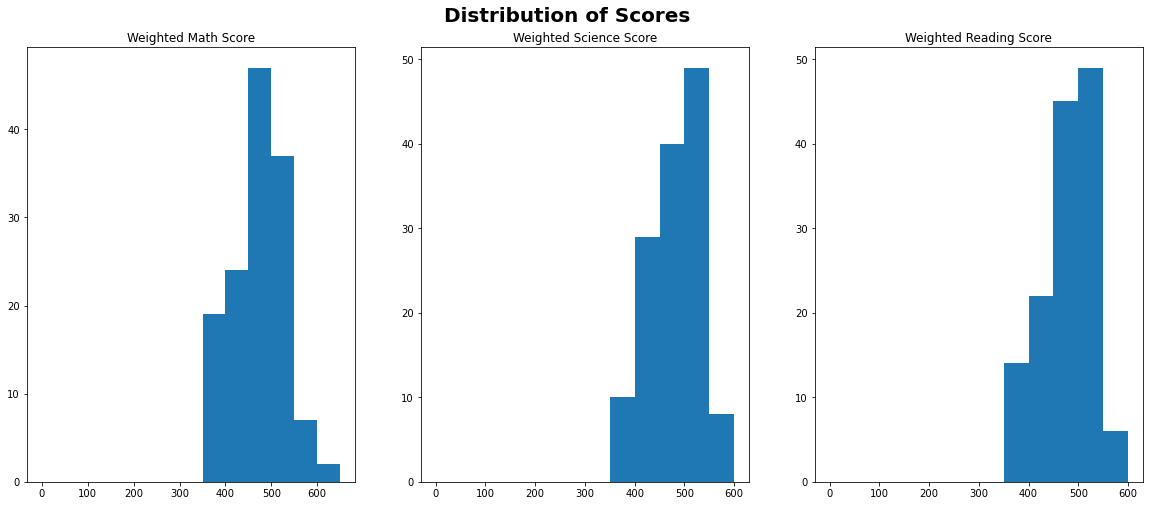

In [15]:
#We can now plot the distribution of scores
plt.figure(figsize = [20,8])
base_color = sb.color_palette()[0]

plt.subplot(1,3,1)
bin_edges = np.arange(0, data2['MATH_FINAL'].max()+50, 50)
plt.hist(data = data2, x = 'MATH_FINAL', bins = bin_edges, color=base_color)
plt.title('Weighted Math Score')

plt.subplot(1,3,2)
bin_edges = np.arange(0, data2['SCIE_FINAL'].max()+50, 50)
plt.hist(data = data2, x = 'SCIE_FINAL',bins = bin_edges, color=base_color)
plt.title('Weighted Science Score')

plt.subplot(1,3,3)
bin_edges = np.arange(0, data2['READ_FINAL'].max()+50, 50)
plt.hist(data = data2, x = 'READ_FINAL',bins = bin_edges, color=base_color)
plt.title('Weighted Reading Score')

plt.suptitle('Distribution of Scores', 
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black');

**Observations**: 
Most students scored between 400 and 500 in Mathematics. In Science and Reading most students scored between 450 and 550.

<a id="unobs"></a>
### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the visualizations, it is quite clear that students are more inclined to pursue a career in Science rather than a career in Mathematics, the most popular learning strategies are figuring out the most important parts to learn, try to improve understanding of mathematical concepts, set learning goals and reiterating through examples, and most students scored between 400 and 500 in Mathematics and between 450 and 550 in Science and Reading. 

Further, educational software, poetry, art and literature are the least popular possessions. It also seems that most households have one car and share one bathroom. Books seem to be in all households and most have 26 to 100 books which does not include magazines, newspapers or school books.

I did not note any unusual points.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Since there were no glaring outliers in any of the variables plotted, there was no need to adjust or change the data.

<a id="bivariate"></a>
## Bivariate Exploration

This section will show the relationship between variables explored in the previous section.

<a id = "top5"></a>
### Which are the Top Five Countries by Scores?

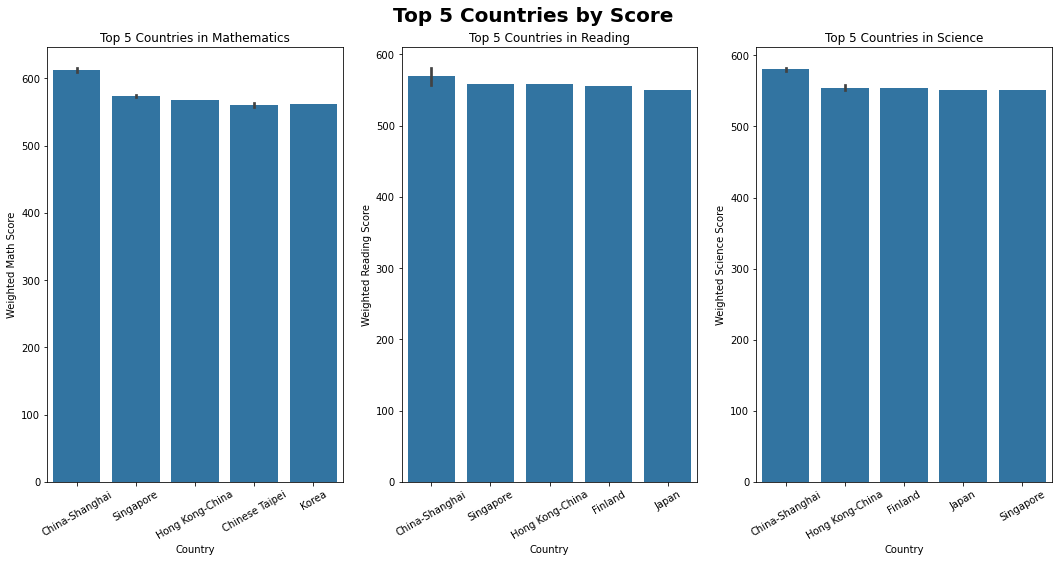

In [16]:

fig = plt.figure(figsize = [18,8])
base_color = sb.color_palette()[0]
yticks = np.arange(0,160000,20000)           

#Let's find out the top 5 countries by Math
plt.subplot(1,3,1)    
sb.barplot(
    y='MATH_FINAL',
    x='CNT',
    data=data2.nlargest(8, 'MATH_FINAL'),
    color=base_color
    )
plt.ylabel('Weighted Math Score')
plt.xlabel('Country')
plt.title('Top 5 Countries in Mathematics')
plt.xticks(rotation=30)

#Plotting the top 5 countries by Reading
plt.subplot(1,3,2)
sb.barplot(
    y='READ_FINAL',
    x='CNT',
    data=data2.nlargest(6, 'READ_FINAL'),
    color=base_color
    )
plt.ylabel('Weighted Reading Score')
plt.xlabel('Country')
plt.title('Top 5 Countries in Reading')
plt.xticks(rotation=30)

#Plotting the top 5 countries by Science
plt.subplot(1,3,3)
sb.barplot(
    y='SCIE_FINAL',
    x='CNT',
    data=data2.nlargest(8, 'SCIE_FINAL'),
    color=base_color
    )
plt.ylabel('Weighted Science Score')
plt.xlabel('Country')
plt.title('Top 5 Countries in Science')
plt.xticks(rotation=30)
plt.suptitle('Top 5 Countries by Score', 
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black');

**Observations**
1. China-Shanghai is the top Country for all subjects
2. Singapore and Hong Kong- China are among the top 5 in all subjects
3. Japan and Finland are among the top 5 countries in Reading and Science but not Maths
4. Chinese Taipei and Korea are in the top 5 countries in Mathematics but not Reading and Science

<a id="gender"></a>
### What is the Relationship between Gender and Acheivement?

<Figure size 1440x576 with 0 Axes>

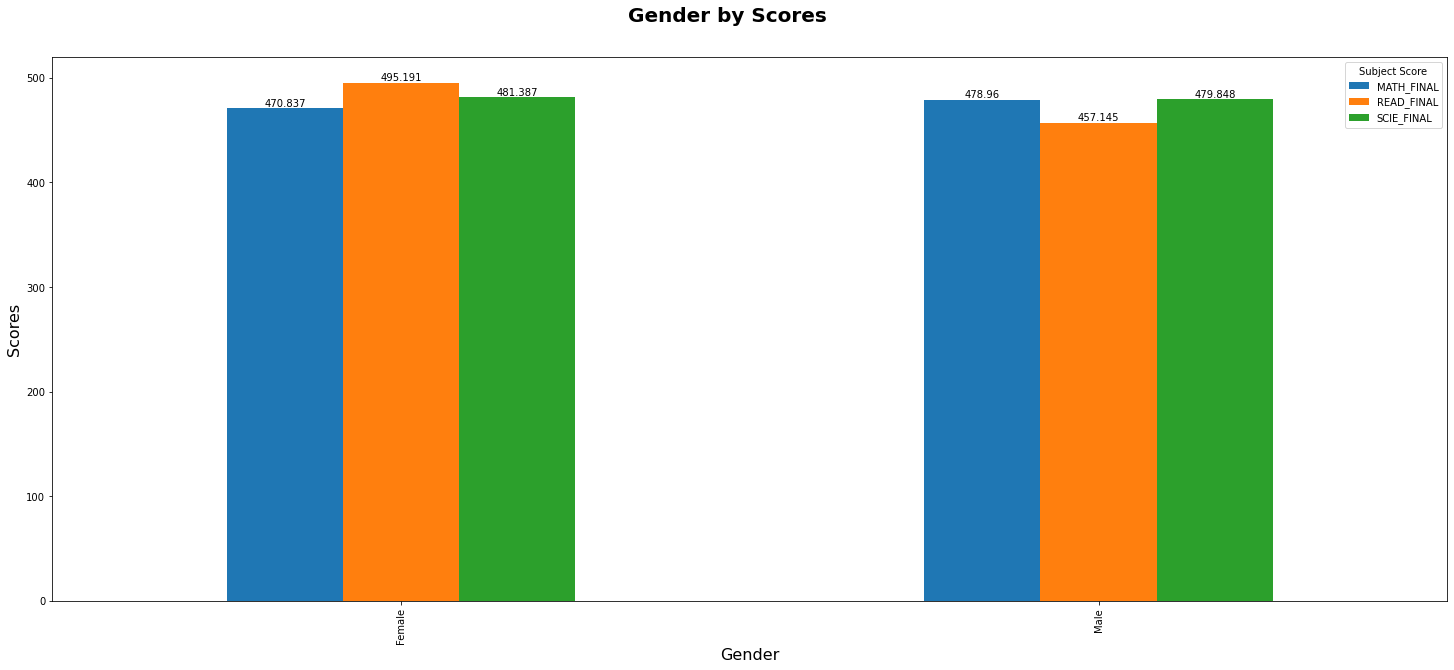

In [17]:
#Gender by Achievement
fig = plt.figure(figsize = [20,8])
gender=data2.groupby(['ST04Q01']).mean()[['MATH_FINAL', 'READ_FINAL', 'SCIE_FINAL']]
fig = gender.plot.bar(figsize=(25,10))
plt.xlabel('Gender', fontsize = 16)
plt.ylabel('Scores', fontsize = 16)
plt.legend(loc='upper right', title='Subject Score')
plt.suptitle('Gender by Scores', 
x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black')
for i in fig.containers:
    fig.bar_label(i);

**Observations**: Female students scored high in Reading and Science while male students scored high in Mathematics

The subsequent variations will mostly focus on exploration of interaction of variables within the Top 5 countries in each subject.

In [18]:
#Create a subset of the dataframe with only the top 7 countries of interest
countries_group = pisa.loc[pisa['CNT'].isin(['Finland','Chinese Taipei', 'China-Shanghai',
                                             'Hong Kong-China', 'Singapore', 'Japan', 
                                             'Korea'])]
countries_group.groupby('CNT')
countries_group.sample(5)

,CNT,ST04Q01,ST15Q01,ST19Q01,ST26Q01,IMMIG,ST26Q02,ST26Q03,ST26Q04,ST26Q05,...,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT
451258,Chinese Taipei,Female,Working full-time <for pay>,Working full-time <for pay>,Yes,Native,Yes,Yes,Yes,Yes,...,524.3281,529.8882,533.8598,571.9867,499.2913,489.0339,546.8482,544.9832,517.0086,54.1813
284263,Japan,Male,Working part-time <for pay>,Working part-time <for pay>,No,Native,Yes,Yes,Yes,No,...,601.4406,558.9375,590.2133,587.0055,632.6371,597.2025,597.2025,642.8944,613.0548,130.5466
175800,Finland,Male,Working full-time <for pay>,Working full-time <for pay>,Yes,Native,Yes,Yes,Yes,No,...,466.6336,427.3383,422.5266,470.6433,557.1056,538.4558,499.2913,503.9537,558.9705,15.9455
426305,Singapore,Female,"Not working, but looking for a job",Working full-time <for pay>,Yes,Native,Yes,Yes,Yes,No,...,390.8840,379.7636,327.3391,381.3522,415.7404,428.7952,385.9008,399.8881,364.4536,6.8003
454150,Chinese Taipei,Female,"Other (e.g. home duties, retired)","Other (e.g. home duties, retired)",No,Native,Yes,Yes,Yes,No,...,587.3963,542.1206,547.6808,553.2409,549.9254,528.4782,551.7904,534.0731,532.2081,48.2087


<a id="futurestrategy"></a>
### What is the Relationship between Future Career Path and Learning Strategies?

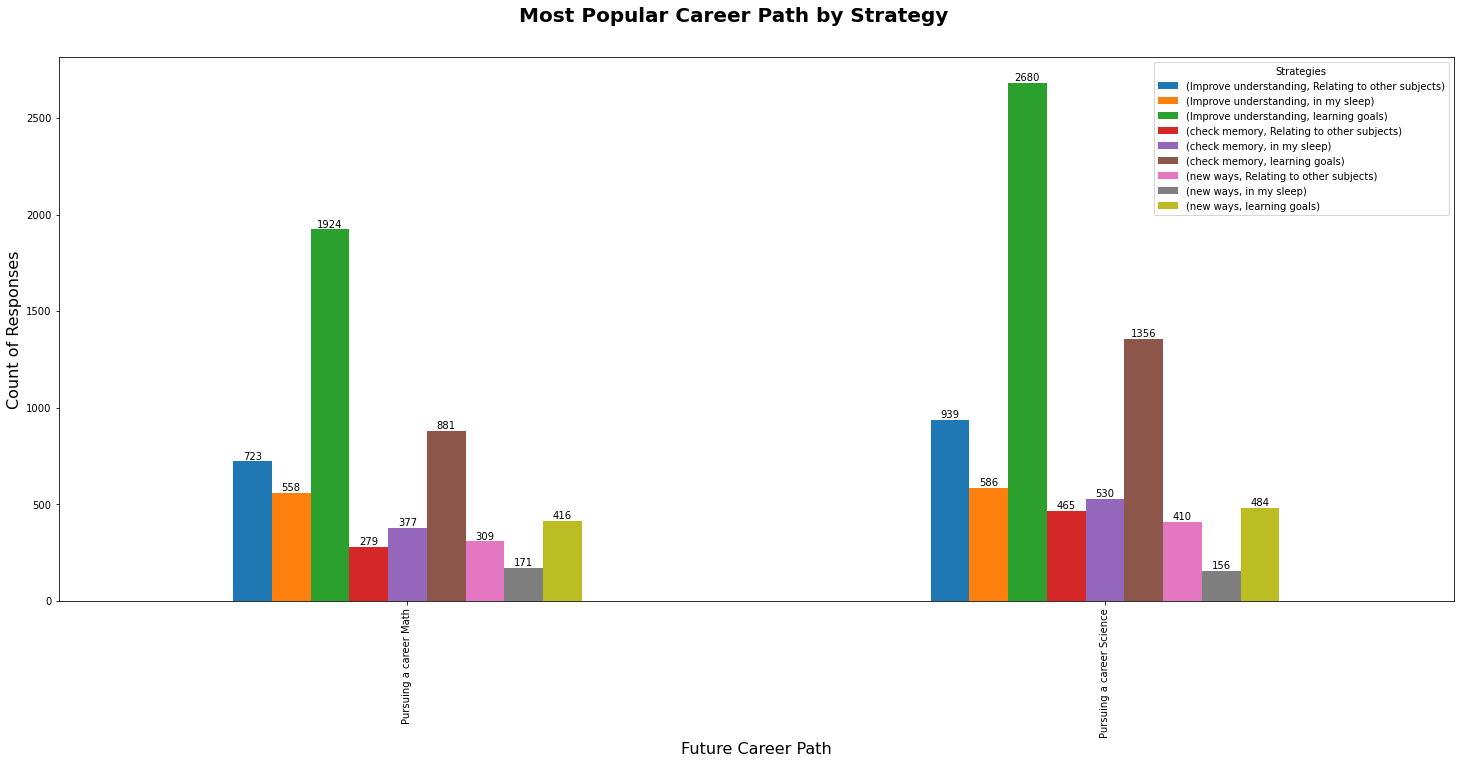

In [19]:
#Create and plot a cross tabulation between career path by learning strategy
pursuits_strategy = pd.crosstab([countries_group.ST48Q05], [countries_group.ST53Q02, countries_group.ST53Q03])

fig = pursuits_strategy.plot(kind='bar', figsize = [25,10])
plt.xlabel('Future Career Path', fontsize = 16)
plt.ylabel('Count of Responses', fontsize = 16)
plt.legend(loc='upper right', title='Strategies')
plt.suptitle('Most Popular Career Path by Strategy', 
x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black')
for i in fig.containers:
    fig.bar_label(i);

**Observations**: For the top performing countries, students planning on pursuing careers in math and science prefer learning by improving their understanding, setting learning goals and checking memory. The least popular learning strategies are finding new ways of finding a solution and going over math problems so often that they feel as if they could solve them in their sleep.

<a id="futurecareer"></a>
### What is the Most Popular Future Career Path in the Top 5 Countries?

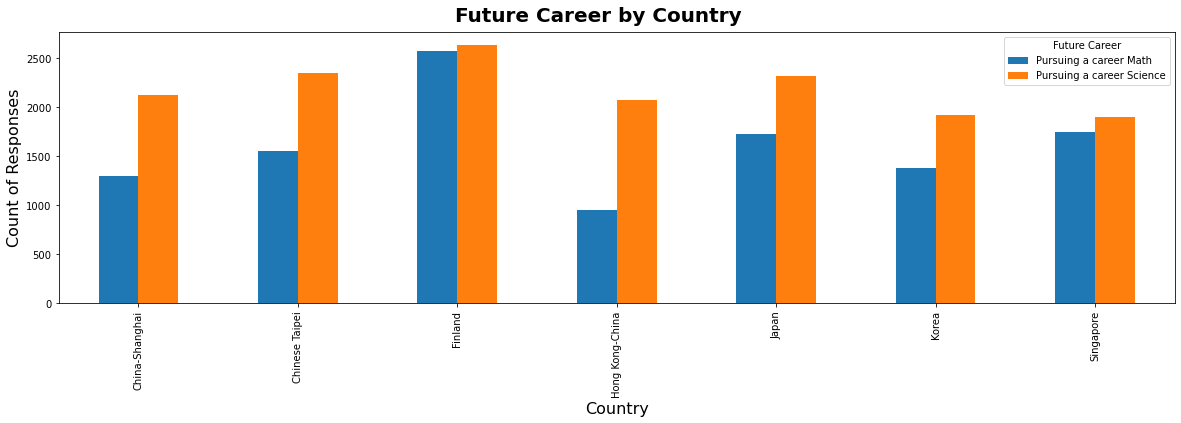

In [20]:
#Create and plot a cross tabulation between career path by country
pursuits_strategy = pd.crosstab(countries_group['CNT'], [countries_group.ST48Q05])
pursuits_strategy.plot(kind='bar', figsize = [20,5])
plt.xlabel('Country', fontsize = 16)
plt.ylabel('Count of Responses', fontsize = 16)
plt.legend(loc='upper right', title='Future Career')
plt.suptitle('Future Career by Country', 
x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black');

**Observations**: It appears that a career in Science is more popular for 15 year olds in the top 5 countries. Students in Finland have the highest preference for careers in mathematics even if they do not rank among the first 5 countries in Math Scores. Student from Hong Kong China have the lowest intention of pursuing a career in Mathematics. Although China Shanghai has the highest math proficiency level, the students are not very interested in pursuing a career in Math.

<a id="popularstrategy"></a>
### Which is the Most Popular Learning Strategy in the Top 5 Countries?

In [21]:
#Let's compute a cross tabulation of LEarning Strategies and Countries
intentions_strategies_table = pd.crosstab(index=countries_group['CNT'], 
                          columns=countries_group['ST53Q01'])

intentions_strategies_table1= pd.crosstab(index=countries_group['CNT'], 
                          columns=countries_group['ST53Q02'])
intentions_strategies_table2= pd.crosstab(index=countries_group['CNT'], 
                          columns=countries_group['ST53Q03'])
intentions_strategies_table3= pd.crosstab(index=countries_group['CNT'], 
                          columns=countries_group['ST53Q04'])
intentions_strategies_table ##To check whether the tables were created

ST53Q01,Most important,by heart,relating to known
CNT,,,
China-Shanghai,1361,883,1193
Chinese Taipei,1692,672,1637
Finland,2598,1712,1363
Hong Kong-China,1820,319,904
Japan,2437,503,1196
Korea,1326,557,1438
Singapore,1719,832,1115


<Figure size 432x288 with 0 Axes>

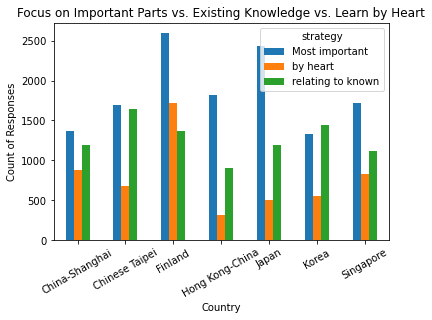

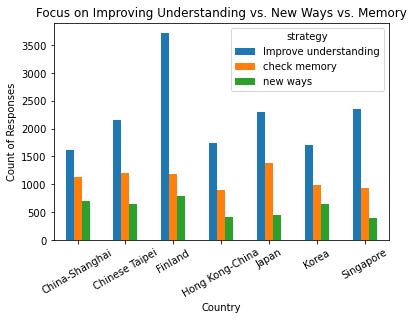

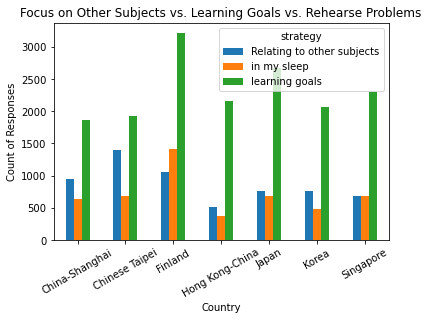

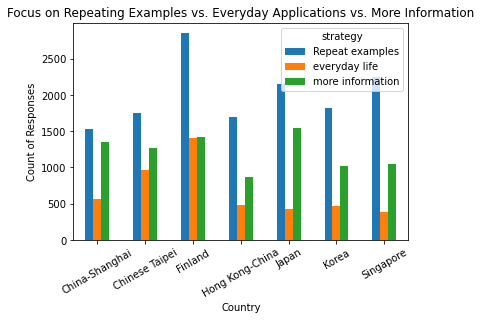

In [22]:
#Plotting learning strategy by country
plt.suptitle('Most Popular Learning Strategy by Country', 
x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black')

fig =intentions_strategies_table.plot(kind="bar")
plt.legend(loc='upper right', title='strategy')
plt.title('Focus on Important Parts vs. Existing Knowledge vs. Learn by Heart')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Country')
plt.ylabel('Count of Responses')


fig =intentions_strategies_table1.plot(kind="bar") 
plt.legend(loc='upper right', title='strategy')
plt.title('Focus on Improving Understanding vs. New Ways vs. Memory')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Country')
plt.ylabel('Count of Responses')

fig =intentions_strategies_table2.plot(kind="bar")
plt.title('Focus on Other Subjects vs. Learning Goals vs. Rehearse Problems')
plt.legend(loc='upper right', title='strategy')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Country')
plt.ylabel('Count of Responses')
plt.xlabel('Country')
plt.ylabel('Count of Responses')

fig = intentions_strategies_table3.plot(kind="bar")
plt.legend(loc='upper right', title='strategy')
plt.title('Focus on Repeating Examples vs. Everyday Applications vs. More Information')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Country')
plt.ylabel('Count of Responses');

**Observations**:
   
   1. The most popular learning strategies across the board are focusing on important parts, improving understanding, setting learning goals, repeating examples. However, Korean students try to understand new concepts by relating them to things they already know.
   2. In Finland, students are also more likely to go over some problems so often that it feels as if they could solve them in their sleep and think about how the mathematics they have learned can be used in everyday life more than students from other countries. They also rely on learning as much as they can by heart.

<a id="bivobs"></a>
### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

1. The most interesting observation is that China-Shanghai was the top Country for all subjects. Despite this, the students prefer careers in Science rather tham Math. The learning strategies adopted by these students do not vary in comparison to students from other Countries.

2. Female students scored high in Reading and Science while male students scored high in Mathematics.

3. Students in Finland have the highest preference for careers in mathematics even if they do not rank among the first 5 countries in Math Scores. On the other hand,  although China Shanghai has the highest math proficiency level, the students are not very interested in pursuing a career in Math.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

1. In Finland, students are more likely to go over some problems so often that it feels as if they could solve them in their sleep and think about how the mathematics they have learned can be used in everyday life more than students from other countries. They also rely on learning as much as they can by heart.

2. Student from Hong Kong China have the lowest intention of pursuing a career in Mathematics.

3. For the top performing countries, students planning on pursuing careers in math and science prefer learning by improving their understanding, setting learning goals and checking memory.

<a id="multivariate"></a>
## Multivariate Exploration

We'll now create plots of three or more variables to investigate the data further, starting with the correlation of the three scores

<a id="pairplot"></a>
### What is the Correlation between Weighted Scores of Math, Reading and Science?

<Figure size 1296x864 with 0 Axes>

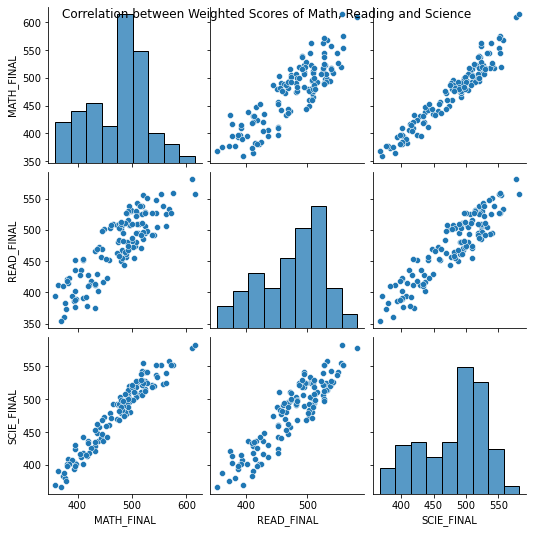

In [23]:
plt.figure(figsize=[18,12])

pairplot= sb.pairplot(data = data2, vars= ['MATH_FINAL',  'READ_FINAL','SCIE_FINAL'])
pairplot.fig.suptitle('Correlation between Weighted Scores of Math, Reading and Science'); 

**Observations**:
There appears to be a positive correlation between all the variable. High Scores in one subject correlates to the scores in another.

For subsequent explorations, we'll explore the relationship between variables and average achievement. We'll start by calculating the average scores for each subject.

<a id="genderachiev"></a>
### Is there a Relationship between Possession of Books, Country and Reading Scores?

In [24]:
#Calculate average score for each subject and save in new columns
pisa['MATH_AVG'] = pisa[['PV1MATH', 'PV2MATH','PV3MATH','PV4MATH','PV5MATH']].mean(axis=1)
pisa['READ_AVG'] = pisa[['PV1READ', 'PV2READ','PV3READ','PV4READ','PV5READ']].mean(axis=1)
pisa['SCIE_AVG'] = pisa[['PV1SCIE', 'PV2SCIE','PV3SCIE','PV4SCIE','PV5SCIE']].mean(axis=1)
pisa['OVERALL_ACHIE'] = pisa[['MATH_AVG', 'READ_AVG', 'SCIE_AVG' ]].mean(axis=1)
pisa.head(2)

,CNT,ST04Q01,ST15Q01,ST19Q01,ST26Q01,IMMIG,ST26Q02,ST26Q03,ST26Q04,ST26Q05,...,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,MATH_AVG,READ_AVG,SCIE_AVG,OVERALL_ACHIE
1,Albania,Female,"Other (e.g. home duties, retired)",Working part-time <for pay>,Yes,Native,No,Yes,No,No,...,341.7009,408.8400,348.2283,367.8105,392.9877,8.9096,366.18634,261.01424,371.91348,333.03802
2,Albania,Female,Working full-time <for pay>,Working full-time <for pay>,Yes,Native,Yes,Yes,Yes,Yes,...,548.9929,471.5964,471.5964,443.6218,454.8116,8.9096,470.56396,384.68832,478.12382,444.45870


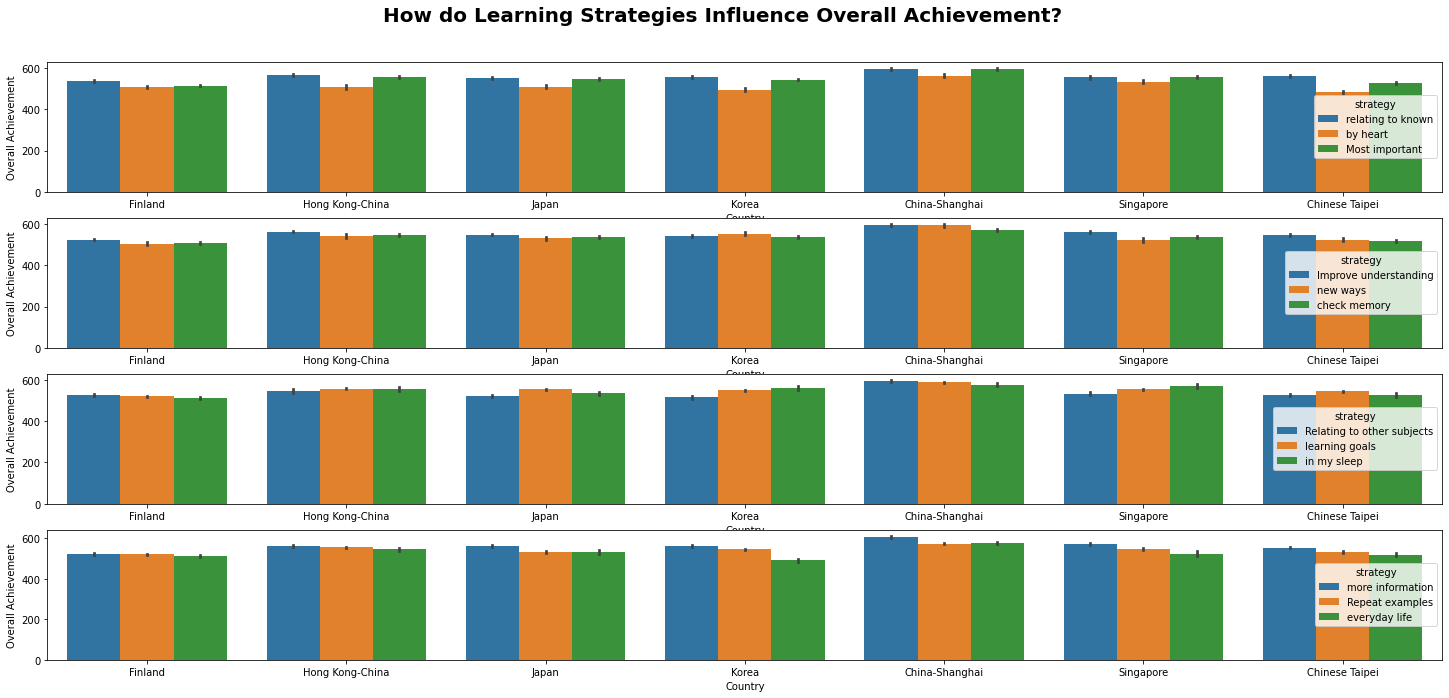

In [25]:
#recereate the subset with the countries of interest
group_countries = pisa.loc[pisa['CNT'].isin(['Finland','Chinese Taipei', 'China-Shanghai',
                                             'Hong Kong-China', 'Singapore', 'Japan', 
                                             'Korea'])]
#create multivariate plot of country, book possession and reading scores
plt.figure(figsize=[25,11])
plt.subplot(4,1,1)
fig = sb.barplot(data=group_countries, x='CNT', y= 'OVERALL_ACHIE', 
           hue = 'ST53Q01')
plt.legend(loc='center right', title='strategy')
plt.xlabel('Country')
plt.ylabel('Overall Achievement')

plt.subplot(4,1,2)
fig = sb.barplot(data=group_countries, x='CNT', y= 'OVERALL_ACHIE', 
           hue = 'ST53Q02')
plt.legend(loc='center right', title='strategy')
plt.xlabel('Country')
plt.ylabel('Overall Achievement')

plt.subplot(4,1,3)
fig = sb.barplot(data=group_countries, x='CNT', y= 'OVERALL_ACHIE', 
           hue = 'ST53Q03')
plt.legend(loc='center right', title='strategy')
plt.xlabel('Country')
plt.ylabel('Overall Achievement')


plt.subplot(4,1,4)
fig = sb.barplot(data=group_countries, x='CNT', y= 'OVERALL_ACHIE', 
           hue = 'ST53Q04')
plt.legend(loc='center right', title='strategy')
plt.xlabel('Country')
plt.ylabel('Overall Achievement')

#plot the title
plt.suptitle('How do Learning Strategies Influence Overall Achievement?', 
x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black');

**Observations**:

Students with the highest overall achievement utilize the same learning strategies across the board. However, for students from Finland, learning strategies do not appear to influence the overall achievement. 

We'll now try to understand how a student's socioeconomic status influences overall achievement and their future career choice.

<a id="sociocountries"></a>
### What is the Impact of SocioEconomic Status on Overall Achievement and Future Career?

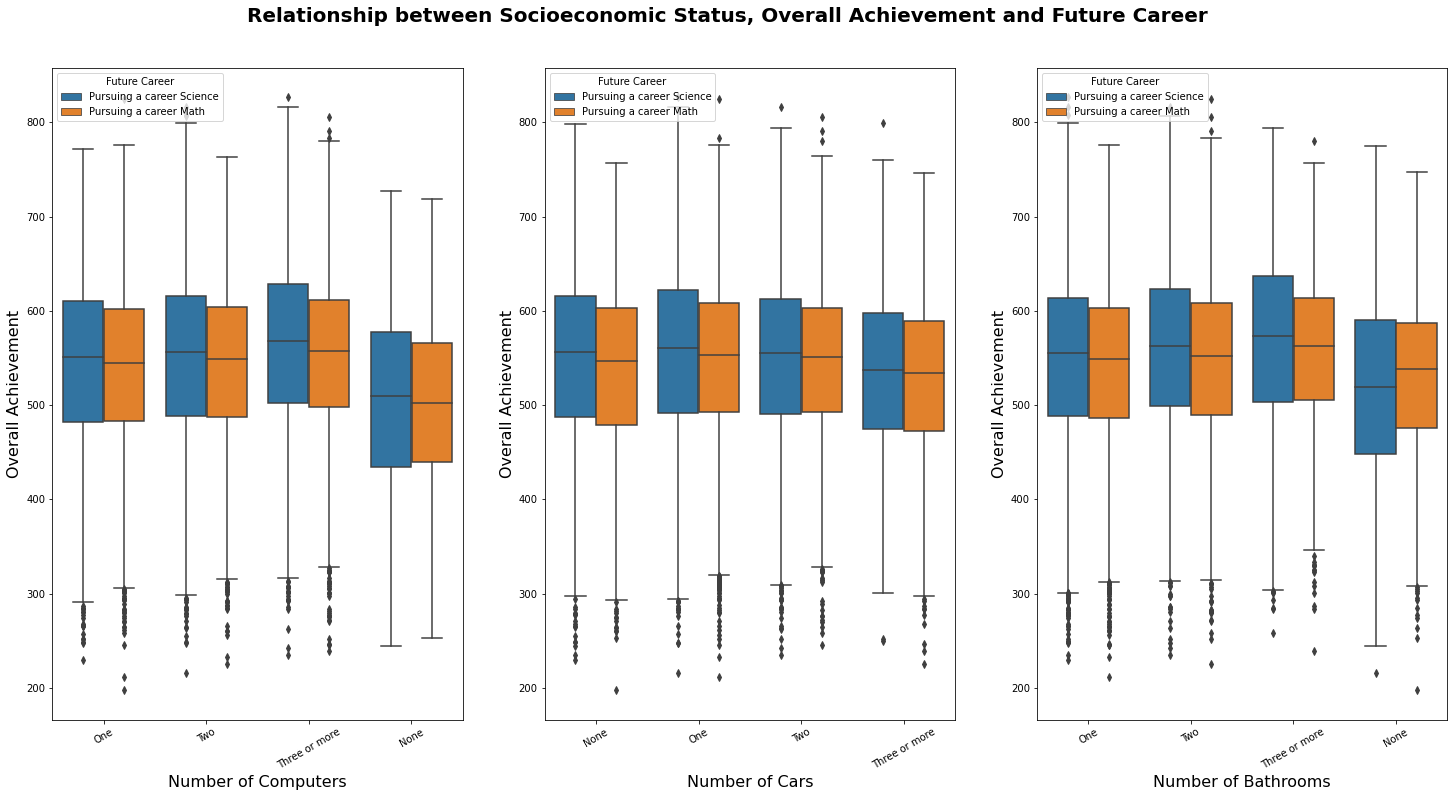

In [26]:
plt.figure(figsize=[25,12]).suptitle('Relationship between Socioeconomic Status, Overall Achievement and Future Career', 
                                     x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black')

plt.subplot(1,3,1)
sb.boxplot(data=group_countries, x='ST27Q03', 
                y='OVERALL_ACHIE', hue = 'ST48Q05')
plt.legend(loc='upper left', title='Future Career')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Number of Computers', fontsize = 16)
plt.ylabel('Overall Achievement', fontsize = 16)

plt.subplot(1,3,2)
sb.boxplot(data=group_countries, x='ST27Q04', 
                y='OVERALL_ACHIE', hue = 'ST48Q05')
plt.legend(loc='upper left', title='Future Career')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Number of Cars', fontsize = 16)
plt.ylabel('Overall Achievement', fontsize = 16)


plt.subplot(1,3,3)
sb.boxplot(data=group_countries, x='ST27Q05', 
                y='OVERALL_ACHIE', hue = 'ST48Q05')
plt.legend(loc='upper left', title='Future Career')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Number of Bathrooms', fontsize = 16)
plt.ylabel('Overall Achievement', fontsize = 16);

**Observations**

Students with three or more computers got the highest scores, while students with no computers and no bathrooms got the lowest scores. The number of cars in a household does not significantly influence a student's prefence for either career or their oveall achievement.

In this next section we try to determine if some possessions improve a student's chances of scoring high in reading.

<a id="possessioncountry"></a>
### What is the Impact of Specific Possessions on Reading Scores and Learning Strategies?

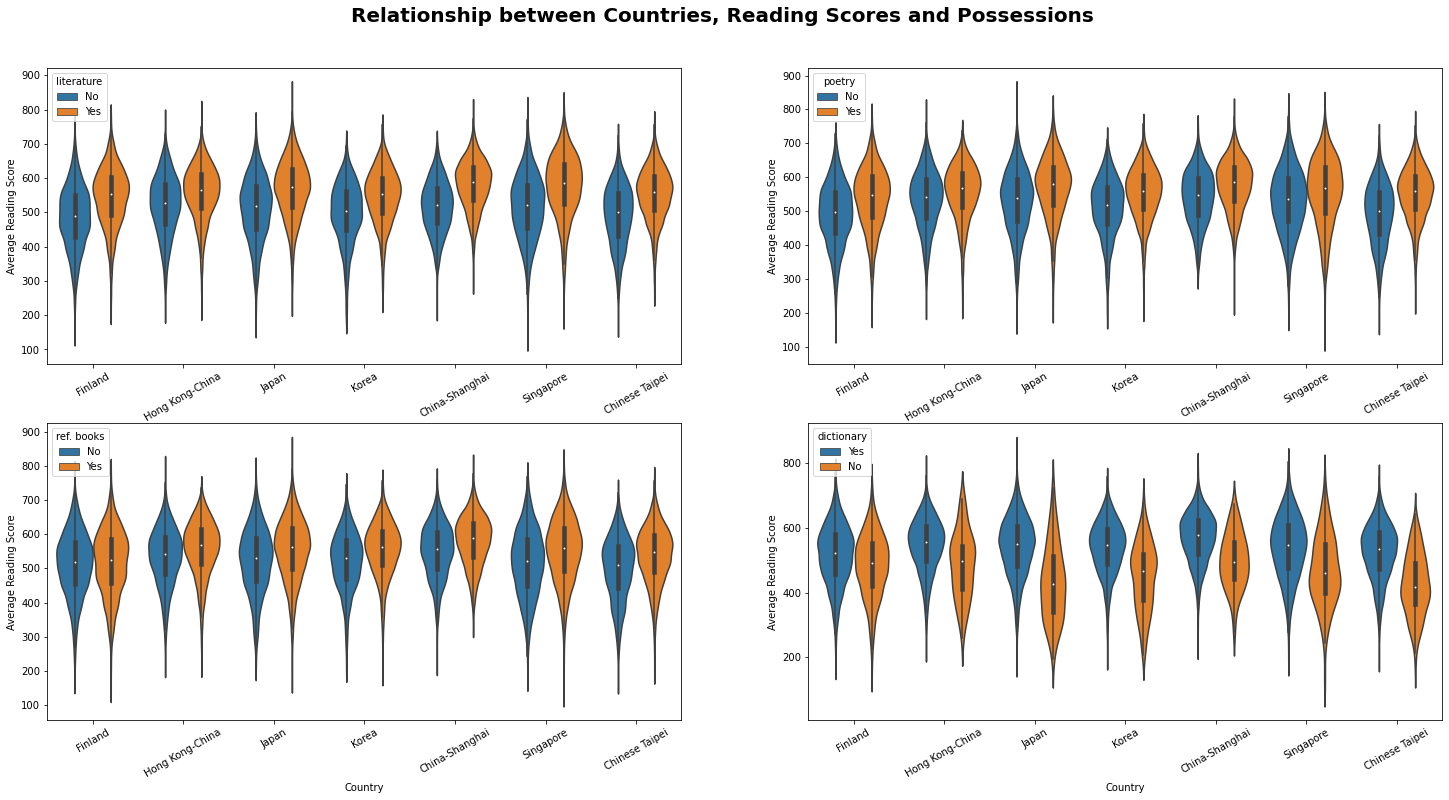

In [27]:
plt.figure(figsize=[25,12]).suptitle('Relationship between Countries, Reading Scores and Possessions', 
                                     x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black')

plt.subplot(2,2,1)
sb.violinplot(data=group_countries, x='CNT', 
                y='READ_AVG', hue = 'ST26Q07') 
plt.legend(loc='upper left', title='literature')
plt.xticks(rotation=30, ha='center')
plt.ylabel('Average Reading Score')

plt.subplot(2,2,2)
sb.violinplot(data=group_countries, x='CNT', 
                y='READ_AVG', hue = 'ST26Q08')
plt.legend(loc='upper left', title='poetry')
plt.xticks(rotation=30, ha='center')
plt.ylabel('Average Reading Score')

plt.subplot(2,2,3)
sb.violinplot(data=group_countries, x='CNT', 
                y='READ_AVG', hue = 'ST26Q11')
plt.legend(loc='upper left', title='ref. books')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Country')
plt.ylabel('Average Reading Score')

plt.subplot(2,2,4)
sb.violinplot(data=group_countries, x='CNT', 
                y='READ_AVG', hue = 'ST26Q12')
plt.legend(loc='upper left', title='dictionary')
plt.xticks(rotation=30, ha='center')
plt.xlabel('Country')
plt.ylabel('Average Reading Score');

**Observations**: Students score higher in reading when they have dictionaries and literature. Technical reference books and poetry do not do not have a significant effect on reading scores.

Going back to the question of socioeconomic status, the next visualizaion shows the relationship between immigration status scores and future academic pursuits.

<a id="immigmath"></a>
### Does a student's Immigration Status influence their Future Academic Pursuits and Average Math Score?

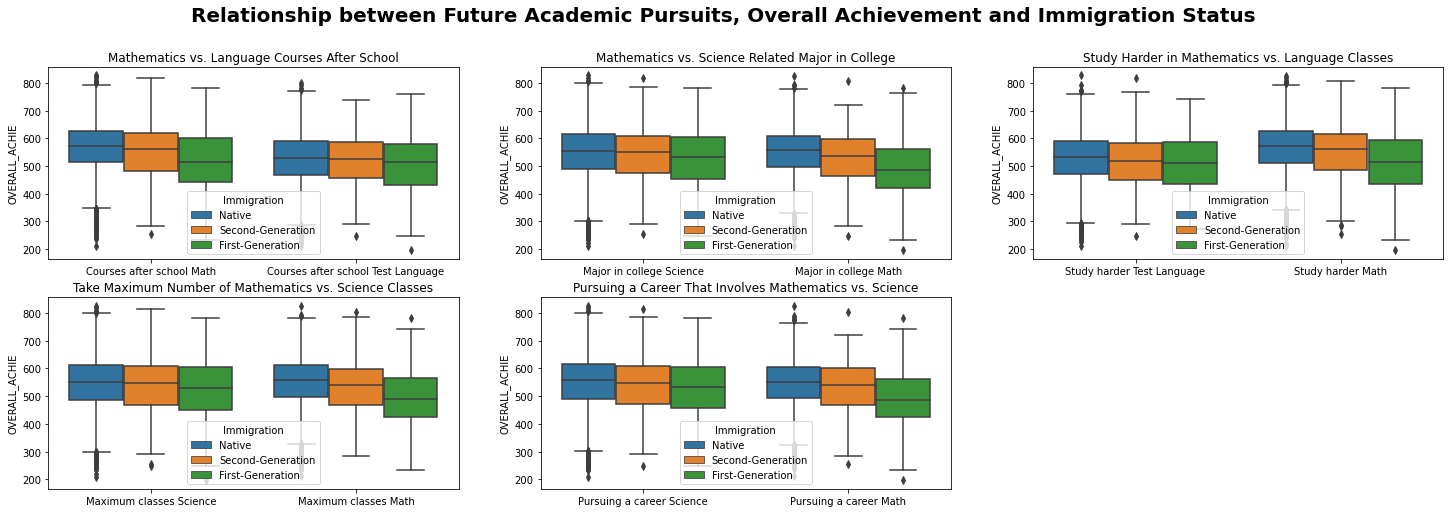

In [32]:
#Distribution of Future Academic Pursuits, Average Math Score and Immigration Status
fig = plt.figure(figsize = (25,12))
plt.suptitle('Relationship between Future Academic Pursuits, Overall Achievement and Immigration Status', 
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black')

ax1 = fig.add_subplot(3,3,1)
sb.boxplot(data=group_countries, x= 'ST48Q01', y='OVERALL_ACHIE', hue='IMMIG')
plt.title('Mathematics vs. Language Courses After School')
plt.legend(loc='lower center', title='Immigration')
plt.xlabel('')

ax2 = fig.add_subplot(3,3,2)
sb.boxplot(data=group_countries, x= 'ST48Q02', y='OVERALL_ACHIE', hue='IMMIG')
plt.title('Mathematics vs. Science Related Major in College')
plt.legend(loc='lower center', title='Immigration')
plt.xlabel('')

ax3 = fig.add_subplot(3,3,3)
sb.boxplot(data=group_countries, x= 'ST48Q03', y='OVERALL_ACHIE', hue='IMMIG')
plt.title('Study Harder in Mathematics vs. Language Classes')
plt.legend(loc='lower center', title='Immigration')
plt.xlabel('')

ax4 = fig.add_subplot(3,3,4)
sb.boxplot(data=group_countries, x= 'ST48Q04', y='OVERALL_ACHIE', hue='IMMIG')
plt.title('Take Maximum Number of Mathematics vs. Science Classes')
plt.legend(loc='lower center', title='Immigration')
plt.xlabel('')

ax5 = fig.add_subplot(3,3,5)
sb.boxplot(data=group_countries, x= 'ST48Q05', y='OVERALL_ACHIE', hue='IMMIG')
plt.title('Pursuing a Career That Involves Mathematics vs. Science')
plt.legend(loc='lower center', title='Immigration')
plt.xlabel('');

**Observations**:
Native Students tend to score high in Math but prefer a career in Science rather than Math while students who are first generation immigrants got the lowest math scores and have the lowest intention of pursuing a career in Math. The preference for careers in Science is almost the same regardless of  a student's immigration status.

We'll now try to understand the relationship between indicators of socioeconomic status, immigration status and overall achievement.

<a id="immigsocio"></a>
### Does a student's Immigration Status influence their Socioeconomic Status and Overall Achievement?

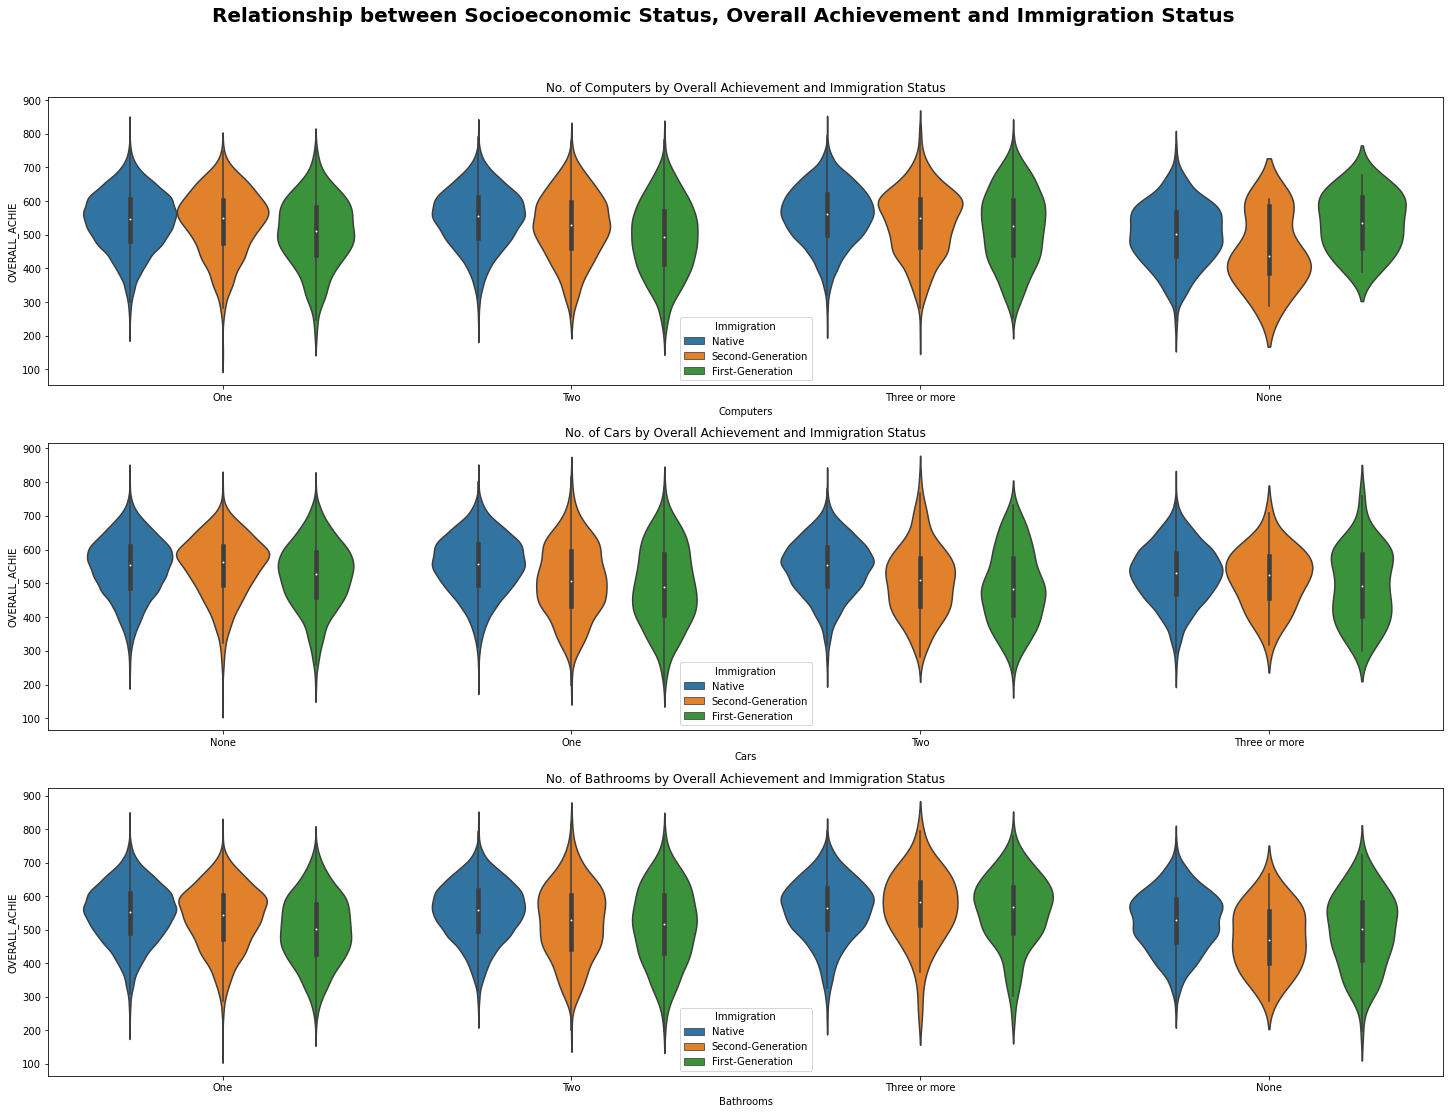

In [33]:
#Distribution of Socioeconomic Status, Overall Achievement and Immigration Status
fig = plt.figure(figsize = (25,18))
plt.suptitle('Relationship between Socioeconomic Status, Overall Achievement and Immigration Status', 
             x = 0.5, y = 0.95, fontsize = 20, fontweight='bold', color = 'black')

ax1 = fig.add_subplot(3,1,1)
sb.violinplot(data=group_countries, x= 'ST27Q03', y='OVERALL_ACHIE', hue='IMMIG')
plt.title('No. of Computers by Overall Achievement and Immigration Status')
plt.legend(loc='lower center', title='Immigration')
plt.xlabel('Computers')

ax2 = fig.add_subplot(3,1,2)
sb.violinplot(data=group_countries, x= 'ST27Q04', y='OVERALL_ACHIE', hue='IMMIG')
plt.title('No. of Cars by Overall Achievement and Immigration Status')
plt.legend(loc='lower center', title='Immigration')
plt.xlabel('Cars')

ax3 = fig.add_subplot(3,1,3)
sb.violinplot(data=group_countries, x= 'ST27Q05', y='OVERALL_ACHIE', hue='IMMIG')
plt.title('No. of Bathrooms by Overall Achievement and Immigration Status')
plt.legend(loc='lower center', title='Immigration')
plt.xlabel('Bathrooms');

**Observation**: A student's immigration status seems to have an effect on their socio economic status. More second generation students have no bathroom and no computers and appear to have more students with a lower overall achievement.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

A student's socioeconomic status has a great effect on their performance. Students with no bathrooms or computers at home score significantly lower than their counterparts. Students of low socioeconomic status do not seem to show much preference in their future career path.

Possession of works of literature and dictionaries influences a student's reading score. 

Students with high scores in one subject tend to perform better in the other subjects as well.
### Were there any interesting or surprising interactions between features?

It was very interesting to see the interactions between a student's socioeconomic status, preferred career paths and the student's country. Students from a low socioeconomic background appear to lag in achievement in comparison to their counterparts. In addition, a student's immigration status does affect their socioeconomic status and overall achievement with second generation immigrant students  with no computers and no bathrooms scoring lower than their counterparts.

<a id="concl"></a>
## Conclusions
In conclusion, the best performing country in the PISA 2012 test was China Shanghai. It is also clear that a student's socioeconomic status and learning strategies influence their achievement. An analysis of indicators of socio economic status shows that students of a lower socioeconomic class score lower than their counterparts.  By visualizing the scores, possessions, indicators of socio-economic status and learning strategies it was possible to understand their distribution which gave insights on how students responded to each question. This analysis also clearly showed the relationship between the mention variables of interest. 
